In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras 
from tensorflow.keras import layers

## Librerías
import numpy as np
import seaborn as sns
import sys
import cv2 as cv2
import glob
from PIL import Image
import tensorflow as tf
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import gc
import keras
from sklearn.model_selection import train_test_split
import os

print(tf.__version__)

2023-10-01 15:47:21.050104: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-01 15:47:21.099112: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.12.0


<Figure size 640x480 with 0 Axes>

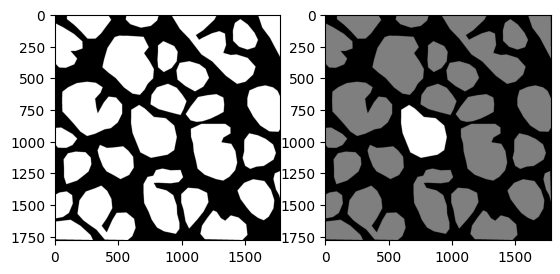

In [16]:
## Obtener todas las rutas de las imágenes en el dataset
rutas_example  = glob.glob('/home/willy98/archivos/Datasets/Micrografías_segmentadas/secas/MF1/1/mask/IMG_20230707_161353_jpg.jpg')[0]

img = keras.utils.load_img(rutas_example)
img_array = keras.utils.img_to_array(img)
new_array = (img_array>64).astype(np.int32)

new_img = keras.utils.array_to_img(new_array)

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2)
axarr[0].imshow(new_img)
axarr[1].imshow(img)

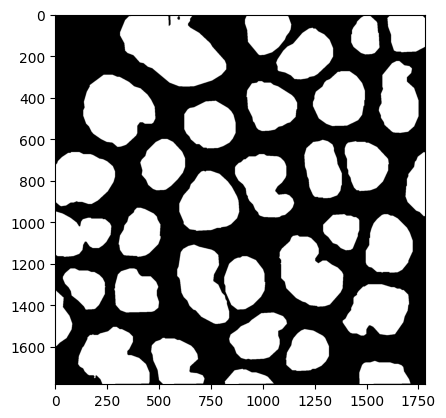

In [17]:
## Obtener todas las rutas de las imágenes en el dataset
rutas_dataset  = glob.glob('/home/willy98/archivos/Datasets/Micrografías_segmentadas/secas/*/*/*/*.jpg')

## Recorrer mascaras
#for ruta in rutas_dataset:
for ruta in rutas_dataset:
    ruta_list = ruta.split('/')
    clase = ruta_list[7]
    number = ruta_list[8]
    tipo = ruta_list[9]
    name = ruta_list[10].split('.')[0]

    ## verificar que sea máscara
    if tipo == 'mask':
        img = keras.utils.load_img(ruta)
        plt.imshow(img)
        img_array = keras.utils.img_to_array(img)
        new_array = (img_array>64).astype(np.int32)


        new_img = keras.utils.array_to_img(new_array)
        plt.imshow(new_img)
        ## save image
        folder = '/home/willy98/archivos/Datasets/Micrografías_segmentadas/secas/'+clase+'/'+number+'/mask_bin/'

        isExist = os.path.exists(folder)
        if not isExist:
            ## Crear carpeta si no existe
            os.makedirs(folder)
            ## Guardar imagen en la ruta
            new_route = folder+name+'.jpg'
            keras.utils.save_img(new_route,new_img,scale=False,)
        else:
            ## Guardar imagen en la ruta
            new_route = folder+name+'.jpg'
            keras.utils.save_img(new_route,new_img,scale=False,file_format=None)   
